# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("LinearRegressionData.csv")
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 훈련 (모델 생성)

LinearRegression()

In [14]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

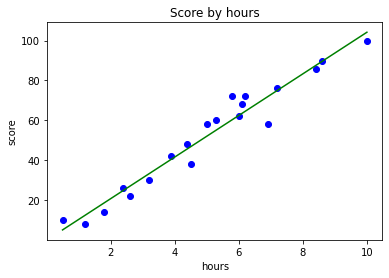

In [15]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, y_pred, color='green') # 선 그래프
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [16]:
print("9시간, 8시간 공부했을 때 예상 점수", reg.predict([[9], [8]])) # 예측의 input은 2차원 배열로 들어가야 한다

9시간, 8시간 공부했을 때 예상 점수 [93.77478776 83.33109082]


In [17]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [18]:
reg.intercept_ # y 절편 (b)

-0.21848470286721522

### 데이터셋 분리

In [21]:
dataset = pd.read_csv("LinearRegressionData.csv")

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 분리된 데이터를 통한 모델링

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

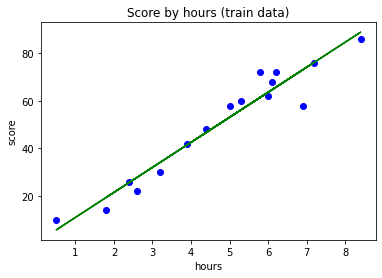

In [30]:
plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

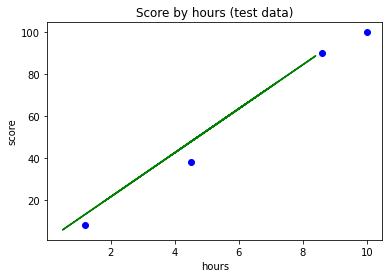

In [31]:
plt.scatter(X_test, y_test, color='blue') # 산점도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [32]:
reg.coef_

array([10.49161294])

In [33]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [35]:
reg.score(X_test, y_test) # 테스트 셋으로 평가

0.9727616474310156

# 경사 하강법

max_iter : 훈련 세트 반복 횟수 (Epoch)

eta0 : 학습률 (learning rate)

In [44]:
from sklearn.linear_model import SGDRegressor # Stochastic Gradient Descent  확률적 경사 하강법
sr = SGDRegressor(max_iter=1000, eta0=0.0001, random_state=0, verbose=1)
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

SGDRegressor(eta0=0.0001, random_state=0, verbose=1)

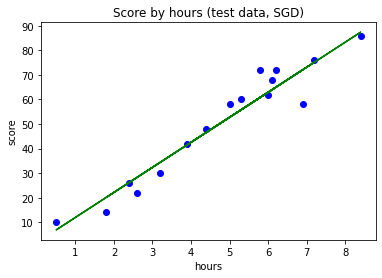

In [45]:
plt.scatter(X_train, y_train, color='blue') # 산점도
plt.plot(X_train, sr.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours (test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [46]:
sr.coef_, sr.intercept_ # 기울기, 절편

(array([10.19197471]), array([1.77603038]))

In [47]:
sr.score(X_test, y_test)

0.9748430825252619